In [1]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lisa Nurfauziyya\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("train.csv", header = 0)

In [3]:
data.isnull().sum()

ID                       1
Usia                     1
Jenis_Kelamin        26912
Waktu_Pendaftaran        1
Waktu_Konsultasi         1
Hari                     1
Dis_1                15662
Dis_2                80442
Dis_3                31337
Dis_4                    1
Dis_5                    1
Dis_6                10362
Dis_7                    1
Dis_8                54692
Dis_9                 7967
Dis_10                   1
Dis_11               29246
Dis_12                   1
Dis_13                   1
Dis_14                   1
Dis_15                   4
Dis_16               87095
Dis_17               66593
Subsidi               5517
Sms_Reminder             1
Salutation               1
Label                    1
dtype: int64

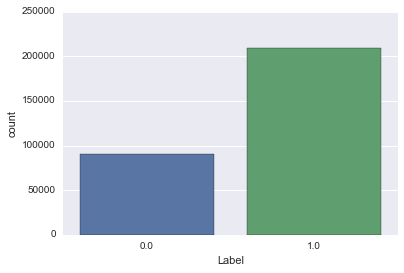

In [4]:
sns.countplot("Label", data = data)

grafik membuktikan bahwa label data tidak seimbang

In [5]:
# hitung jumlah label = 1
count_datang = len(data[data["Label"]==1])
# hitung jumlah label = 0
count_absen = len(data[data["Label"]==0])

print "datang: ", count_datang
print "absen: ", count_absen

datang:  209119
absen:  90581


In [6]:
#Sementara pake metode most frequent semua. Selanjutnya mau nyoba pake linear Regression (Menyusul) 
data['Jenis_Kelamin'].fillna("F",inplace = True) #Most Frequent
data['Dis_1'].fillna(0.0,inplace = True) #Most Frequent
data['Dis_2'].fillna(2.0,inplace = True) #--> ada 4 nilai 2.0 (215127),7.0 (3761),12.0 (336),17.0 (26),22.0 (9)
data['Dis_3'].fillna(1.0,inplace = True)
data['Dis_4'].fillna(0.0,inplace = True) #Most Frequent
data['Dis_5'].fillna(0.0,inplace = True) #Most Frequent
data['Dis_6'].fillna(3.0,inplace = True) #Most Frequent
data['Dis_8'].fillna(1.0,inplace = True)
data['Dis_9'].fillna(1.0,inplace = True) #Most Frequent
data['Dis_11'].fillna(5.0,inplace = True) #Most Frequent
data['Dis_15'].fillna(0.0,inplace = True) #0.0 269679, -2.0 22526, 1.0 6650, -1.0 842. Missing value ada 3
data['Dis_16'].fillna("V",inplace = True) #v dan V. Missing value paling banyak
data['Dis_17'].fillna("H",inplace = True)
data['Subsidi'].fillna(0.0, inplace = True) #Most Frequent

data.head()

,ID,Usia,Jenis_Kelamin,Waktu_Pendaftaran,Waktu_Konsultasi,Hari,Dis_1,Dis_2,Dis_3,Dis_4,...,Dis_12,Dis_13,Dis_14,Dis_15,Dis_16,Dis_17,Subsidi,Sms_Reminder,Salutation,Label
0,1.0,19.0,M,16/12/2014 14.46,14/01/2015,Wednesday,0.0,2.0,1.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,D.,1.0
1,2.0,24.0,F,18/08/2015 07.01,19/08/2015,Wednesday,0.0,2.0,1.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,Sra.,1.0
2,3.0,4.0,F,17/02/2014 12.53,18/02/2014,Tuesday,0.0,2.0,1.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,Srta.,1.0
3,4.0,5.0,M,23/07/2014 17.02,07/08/2014,Thursday,0.0,2.0,1.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,1.0,Sr.,1.0
4,5.0,38.0,M,21/10/2015 15.20,27/10/2015,Tuesday,0.0,2.0,1.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,1.0,D.,1.0


In [7]:
#Menghapus Atribut ID, Waktu_Pendaftaran, dan Waktu_Konsultasi karena nilanya terlalu unique
data.drop("ID", axis = 1, inplace = True)
data.drop("Waktu_Pendaftaran", axis = 1, inplace = True)
data.drop("Waktu_Konsultasi", axis = 1, inplace = True)

data.head()

,Usia,Jenis_Kelamin,Hari,Dis_1,Dis_2,Dis_3,Dis_4,Dis_5,Dis_6,Dis_7,...,Dis_12,Dis_13,Dis_14,Dis_15,Dis_16,Dis_17,Subsidi,Sms_Reminder,Salutation,Label
0,19.0,M,Wednesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,D.,1.0
1,24.0,F,Wednesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,Sra.,1.0
2,4.0,F,Tuesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,Srta.,1.0
3,5.0,M,Thursday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,1.0,Sr.,1.0
4,38.0,M,Tuesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,1.0,D.,1.0


In [8]:
#nilai usia yang minus diganti 0
for i in range(len(data)):
    if data.Usia.values[i] < 0:
        data.Usia.values[i] = 0
data.head()

,Usia,Jenis_Kelamin,Hari,Dis_1,Dis_2,Dis_3,Dis_4,Dis_5,Dis_6,Dis_7,...,Dis_12,Dis_13,Dis_14,Dis_15,Dis_16,Dis_17,Subsidi,Sms_Reminder,Salutation,Label
0,19.0,M,Wednesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,D.,1.0
1,24.0,F,Wednesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,Sra.,1.0
2,4.0,F,Tuesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,0.0,Srta.,1.0
3,5.0,M,Thursday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,1.0,Sr.,1.0
4,38.0,M,Tuesday,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,H,0.0,V,H,0.0,1.0,D.,1.0


In [9]:
# standardscaler!!
#Data Transformation
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Jenis_Kelamin.values)
data["Jenis_Kelamin"] = le.transform(data.Jenis_Kelamin.values)
Jenis_Kelamin_labels = data["Jenis_Kelamin"].unique()
Jenis_Kelamin_labelsE = le.inverse_transform(Jenis_Kelamin_labels)

le.fit(data.Hari.values)
data["Hari"] = le.transform(data.Hari.values)
Hari_labels = data["Hari"].unique()
Hari_labelsE = le.inverse_transform(Hari_labels)

le.fit(data.Dis_14.values)
data["Dis_14"] = le.transform(data.Dis_14.values)
Dis_14_labels = data["Dis_14"].unique()
Dis_14_labelsE = le.inverse_transform(Dis_14_labels)

le.fit(data.Dis_16.values)
data["Dis_16"] = le.transform(data.Dis_16.values)
Dis_16_labels = data["Dis_16"].unique()
Dis_16_labelsE = le.inverse_transform(Dis_16_labels)

le.fit(data.Dis_17.values)
data["Dis_17"] = le.transform(data.Dis_17.values)
Dis_17_labels = data["Dis_17"].unique()
Dis_17_labelsE = le.inverse_transform(Dis_17_labels)

le.fit(data.Salutation.values)
data["Salutation"] = le.transform(data.Salutation.values)
Salutation_labels = data["Salutation"].unique()
Salutation_labelsE = le.inverse_transform(Salutation_labels)

data.head(10)

,Usia,Jenis_Kelamin,Hari,Dis_1,Dis_2,Dis_3,Dis_4,Dis_5,Dis_6,Dis_7,...,Dis_12,Dis_13,Dis_14,Dis_15,Dis_16,Dis_17,Subsidi,Sms_Reminder,Salutation,Label
0,19.0,1,7,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,0.0,1,1.0
1,24.0,0,7,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,0.0,3,1.0
2,4.0,0,6,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,0.0,4,1.0
3,5.0,1,5,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,1.0,2,1.0
4,38.0,1,6,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,1.0,1,1.0
5,5.0,0,6,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,1.0,4,0.0
6,46.0,0,6,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,1.0,3,1.0
7,4.0,0,1,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,1.0,1.0,4,1.0
8,20.0,0,6,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,0.0,1,0.0,0,0,0.0,0.0,3,1.0
9,51.0,0,6,1.0,2.0,1.0,0.0,1.0,5.0,0.0,...,0.0,0.0,1,-2.0,0,0,0.0,1.0,3,1.0


In [10]:
data.isnull().values.any()

True

## Under Sampling

In [11]:
indeks_datang = np.array(data[data.Label==1].index)
indeks_absen = np.array(data[data.Label==0].index)

def undersample(indeks_datang, indeks_absen, times):
    indeks_datang_undersample = np.array(np.random.choice(indeks_datang, 
                                                          (times * count_absen),
                                                         replace = True))
    undersample_data = np.concatenate([indeks_absen, indeks_datang_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
#     print("the arrive proportion is :",len(undersample_data[undersample_data.Label==0])/len(undersample_data[undersample_data.Label]))
#     print("the absence transacation proportion is :",len(undersample_data[undersample_data.Label==1])/len(undersample_data[undersample_data.Label]))
#     print("total number of record in resampled data is:",len(undersample_data[undersample_data.Label]))
    return undersample_data

In [12]:
from sklearn import metrics

def model(model, f_train, f_test, l_train, l_test):
    clf = model
    clf.fit(f_train, l_train.values.ravel())
    pred = clf.predict(f_test)
    cnf_matrix = confusion_matrix(l_test, pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n------------------------------------Classification Report------------------------------------")
    print("The accuracy is: %2f" % metrics.accuracy_score(l_test,pred))
    print("The precision is: %2f" % metrics.precision_score(l_test,pred))
    print "\r\n"

In [13]:
def preparation(x):
    x_features = x.ix[:,x.columns != "Label"]
    x_labels = x.ix[:,x.columns == "Label"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(
    x_features, x_labels, test_size = 0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

### Logistic Regression - Under Sampling

under sample data for 1 proportion
the model classification for 1 proportion
length of training data
126813
length of test data
54349
('the recall for this model is :', 0)
('TP', 13643)
('TN', 16704)
('FP', 10478)
('FN', 13524)


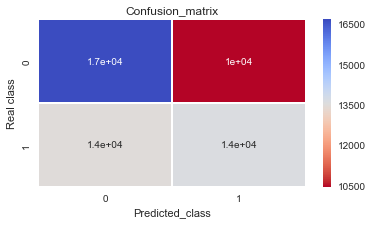


------------------------------------Classification Report------------------------------------
The accuracy is: 0.558373
The precision is: 0.565607


under sample data for 2 proportion
the model classification for 2 proportion
length of training data
190220
length of test data
81523
('the recall for this model is :', 0)
('TP', 54165)
('TN', 101)
('FP', 27193)
('FN', 64)


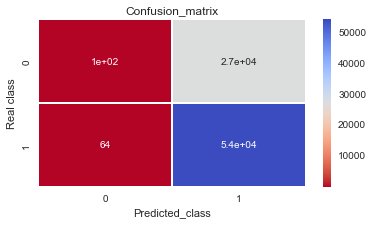


------------------------------------Classification Report------------------------------------
The accuracy is: 0.665653
The precision is: 0.665761


under sample data for 3 proportion
the model classification for 3 proportion
length of training data
253626
length of test data
108698
('the recall for this model is :', 1)
('TP', 81606)
('TN', 0)
('FP', 27092)
('FN', 0)


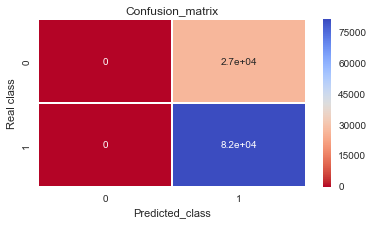


------------------------------------Classification Report------------------------------------
The accuracy is: 0.750759
The precision is: 0.750759




In [14]:
for i in range(1,4):
    print "under sample data for", i, "proportion"
    Undersample_data = undersample(indeks_datang, indeks_absen, i)
    print "the model classification for", i, "proportion"
    undersample_f_train, undersample_f_test, undersample_l_train, undersample_l_test = preparation(Undersample_data)
    clf = LogisticRegression()
    model(clf, undersample_f_train, undersample_f_test, undersample_l_train, undersample_l_test)

### Random Forest - Under Sampling

under sample data for 1 proportion
the model classification for 1 proportion
length of training data
126813
length of test data
54349
('the recall for this model is :', 0)
('TP', 14338)
('TN', 15487)
('FP', 11821)
('FN', 12703)


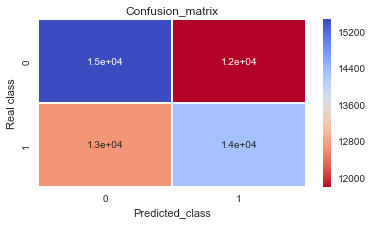


------------------------------------Classification Report------------------------------------
The accuracy is: 0.548768
The precision is: 0.548110


under sample data for 2 proportion
the model classification for 2 proportion
length of training data
190220
length of test data
81523
('the recall for this model is :', 0)
('TP', 50845)
('TN', 2916)
('FP', 24165)
('FN', 3597)


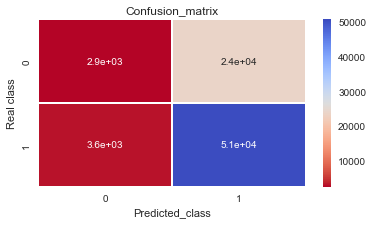


------------------------------------Classification Report------------------------------------
The accuracy is: 0.659458
The precision is: 0.677843


under sample data for 3 proportion
the model classification for 3 proportion
length of training data
253626
length of test data
108698
('the recall for this model is :', 0)
('TP', 79531)
('TN', 1394)
('FP', 25832)
('FN', 1941)


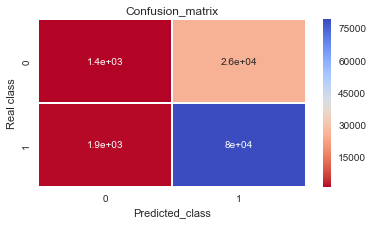


------------------------------------Classification Report------------------------------------
The accuracy is: 0.744494
The precision is: 0.754829




In [15]:
for i in range(1,4):
    print "under sample data for", i, "proportion"
    Undersample_data = undersample(indeks_datang, indeks_absen, i)
    print "the model classification for", i, "proportion"
    undersample_f_train, undersample_f_test, undersample_l_train, undersample_l_test = preparation(Undersample_data)
    clf = RandomForestClassifier(n_estimators=100)
    model(clf, undersample_f_train, undersample_f_test, undersample_l_train, undersample_l_test)

### Submission

In [16]:
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)
# data = pd.read_csv("test.csv", header = 0)
merge = [train, test]
data = pd.concat(merge)
data = data.dropna(how='all')
data.isnull().sum()
ID = data["ID"]

In [17]:
len_train = len(train)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299
Data columns (total 27 columns):
Dis_1                284323 non-null float64
Dis_10               300000 non-null float64
Dis_11               270737 non-null float64
Dis_12               300000 non-null float64
Dis_13               300000 non-null float64
Dis_14               300000 non-null object
Dis_15               299997 non-null float64
Dis_16               212829 non-null object
Dis_17               233365 non-null object
Dis_2                219508 non-null float64
Dis_3                268642 non-null float64
Dis_4                299998 non-null float64
Dis_5                299998 non-null float64
Dis_6                289622 non-null float64
Dis_7                300000 non-null float64
Dis_8                245265 non-null float64
Dis_9                292018 non-null float64
Hari                 300000 non-null object
ID                   300000 non-null float64
Jenis_Kelamin        273064 non-null obje

In [19]:
df_train = merge[0:len_train]
df_test = merge[len_train:] 

y_train = df_train[:,data.columns != "Label"]
X_train =df_train[:,data.columns == "Label"]

y_test = df_test[:,data.columns != "Label"]
X_test =df_test.drop[:,data.columns == "Label"]

TypeError: list indices must be integers, not tuple

In [ ]:
pred = clf.predict(data)

In [ ]:
data.head()

In [ ]:
submit = pd.DataFrame()
submit['Id'] = ID
submit['Probability'] = pred
submit.to_csv('submission1.csv', index = False)